## Customer Segmentation

# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Data

In [5]:
df = pd.read_csv("segmentation.csv")
df.head()

,customer_id,age,income,spending_score,region
0,CUST_1,56,23343,81,Oeste
1,CUST_2,69,33500,5,Sul
2,CUST_3,46,73222,29,Leste
3,CUST_4,32,49375,4,Oeste
4,CUST_5,60,29662,10,Oeste


# Missing values

In [21]:
# Checking for missing values.

df.isnull().sum()

,0
customer_id,0
age,0
income,0
spending_score,0
region_Norte,0
region_Oeste,0
region_Sul,0
cluster,0


## Outliers

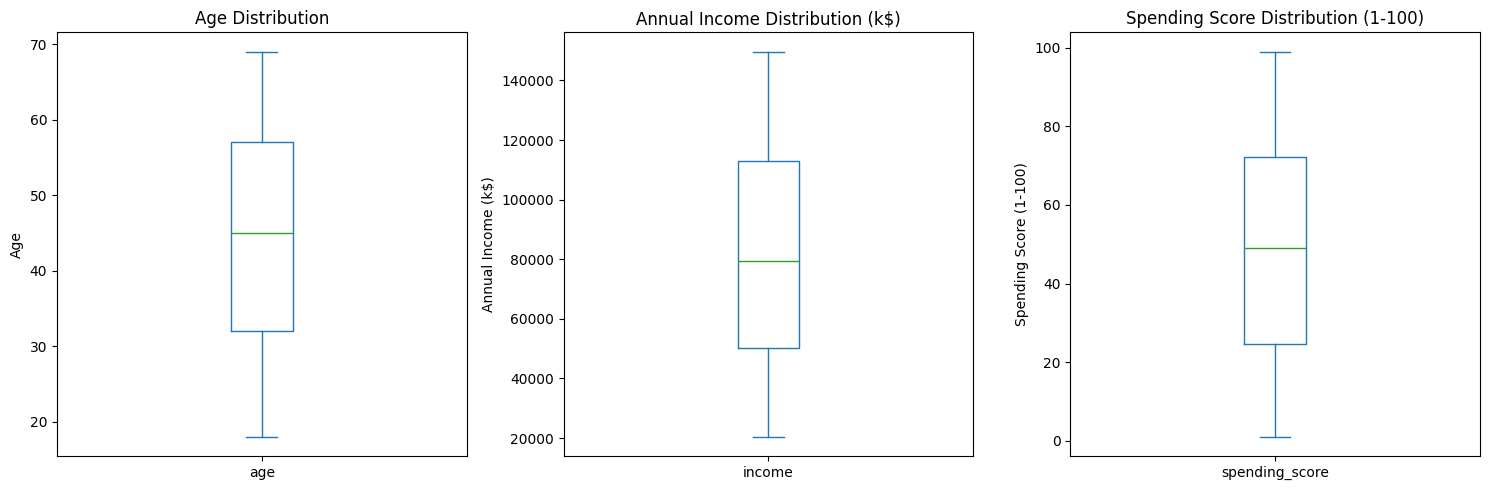

In [22]:
# Checking for outliers in 'age', 'income', and 'spending_score' variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['age'].plot(kind='box')
plt.title('Age Distribution')
plt.ylabel('Age')

plt.subplot(1, 3, 2)
df['income'].plot(kind='box')
plt.title('Annual Income Distribution (k$)')
plt.ylabel('Annual Income (k$)')

plt.subplot(1, 3, 3)
df['spending_score'].plot(kind='box')
plt.title('Spending Score Distribution (1-100)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

### Turning the "Region" variable into dummies

In [8]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,customer_id,age,income,spending_score,region_Norte,region_Oeste,region_Sul
0,CUST_1,56,23343,81,False,True,False
1,CUST_2,69,33500,5,False,False,True
2,CUST_3,46,73222,29,False,False,False
3,CUST_4,32,49375,4,False,True,False
4,CUST_5,60,29662,10,False,True,False


### Exploratory Analysis

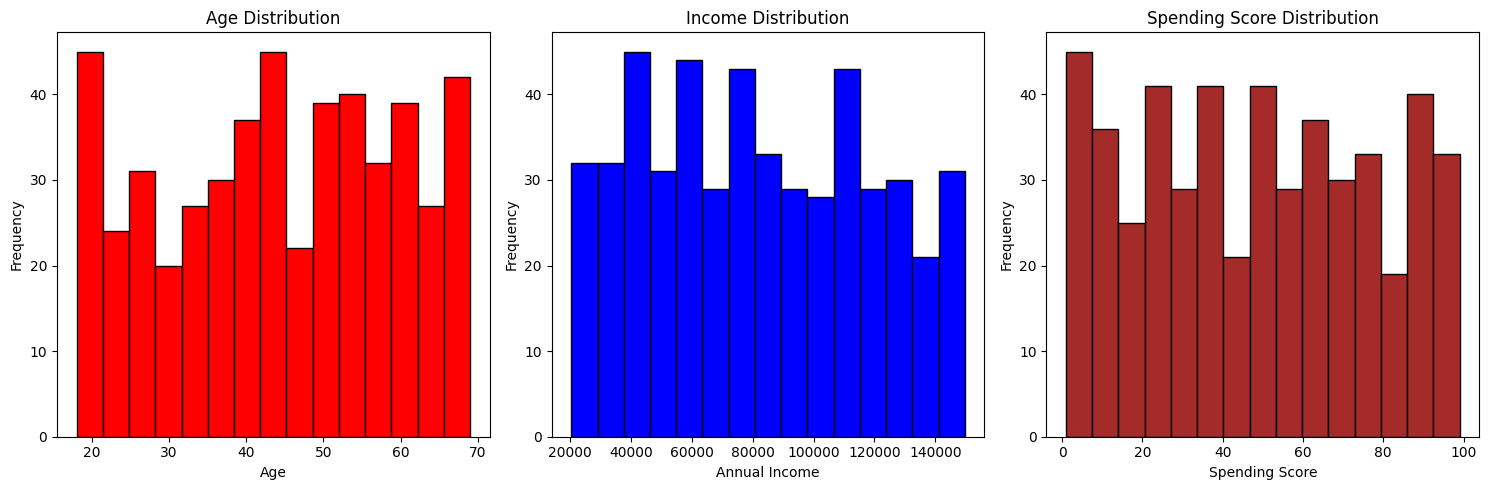

In [44]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=15, color='red', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(df['income'], bins=15, color='blue', edgecolor='black')
plt.title("Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(df['spending_score'], bins=15, color='brown', edgecolor='black')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Dropping the "ID" colummn

In [23]:
# Dropping the "ID" column as it has no semantic value
X = df.drop(columns=['customer_id'])
X.head()

,age,income,spending_score,region_Norte,region_Oeste,region_Sul,cluster
0,56,23343,81,False,True,False,2
1,69,33500,5,False,False,True,1
2,46,73222,29,False,False,False,3
3,32,49375,4,False,True,False,2
4,60,29662,10,False,True,False,2


### Standartization

In [24]:
# Standardize the data to avoid discrepancies in scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.78423339, -1.60481921,  1.13143949, ...,  1.92794739,
        -0.59583014,  0.50592071],
       [ 1.6496862 , -1.32607195, -1.50546334, ..., -0.51868635,
         1.67833069, -0.37241385],
       [ 0.11850046, -0.23594703, -0.67275718, ..., -0.51868635,
        -0.59583014,  1.38425526],
       ...,
       [ 0.85080668,  0.23520912,  1.37431212, ..., -0.51868635,
        -0.59583014,  1.38425526],
       [ 1.18367315, -0.2604544 ,  1.02735122, ..., -0.51868635,
         1.67833069, -0.37241385],
       [-1.74555174,  1.66305815, -0.56866891, ..., -0.51868635,
        -0.59583014,  1.38425526]])

### PCA

In [25]:
# Here we run PCA to find the "n" best components, retaining 95% of the original dataset's variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Number of principal components: {X_pca.shape[1]}")

Number of principal components: 6


In [13]:
X_pca

array([[-0.80263914,  2.56931754,  0.27616069,  0.02913605, -1.1702955 ,
         0.4890585 ],
       [-1.6074983 , -1.17169063,  2.05045356, -1.01176719, -0.94687467,
         0.37357134],
       [-0.099575  , -0.04171478,  0.45748823, -0.51311611,  0.1123418 ,
        -1.01901617],
       ...,
       [ 0.05970248,  0.36453105, -0.00257715,  1.33139897, -0.95362536,
        -0.92864883],
       [-1.31936217, -0.85440867,  0.30788189,  1.05711074, -1.4614048 ,
         0.42470978],
       [ 0.22821843, -0.60156486, -1.22072198,  0.10463532,  1.97036319,
        -1.16259618]])

### Ideal number of clusters

In [26]:
inertia = []  # List to store inertia values for each k (number of clusters)
silhouette_scores = []  # List to store silhouette index values for each k
cluster_range = range(2, 10)  # Range of the number of clusters to be tested (from 2 to 9)

for k in cluster_range:  # For each value of k in the defined range
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Create the KMeans model with k clusters
    kmeans.fit(X_pca)  # Train the model with the data reduced via PCA
    inertia.append(kmeans.inertia_)  # Store the inertia (sum of squared distances of samples to their closest cluster center)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))  # Calculate and store the silhouette index (quality of clusters)

In [27]:
for k, sil_score in zip(cluster_range, silhouette_scores):  # For each value of k and its respective Silhouette Score
    print(f"Clusters: {k}, Silhouette Score: {sil_score:.4f}")  # Display the number of clusters tested and the score with 4 decimal places

Clusters: 2, Silhouette Score: 0.2867
Clusters: 3, Silhouette Score: 0.3550
Clusters: 4, Silhouette Score: 0.3866
Clusters: 5, Silhouette Score: 0.3426
Clusters: 6, Silhouette Score: 0.3048
Clusters: 7, Silhouette Score: 0.3104
Clusters: 8, Silhouette Score: 0.2856
Clusters: 9, Silhouette Score: 0.2904


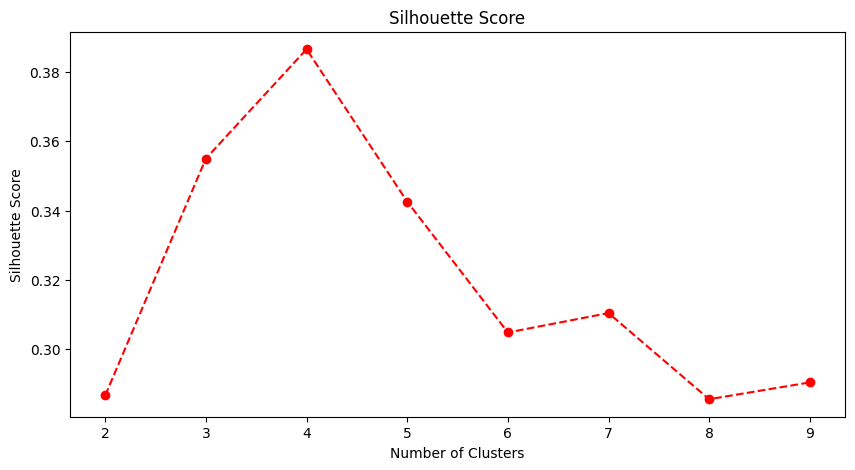

In [28]:
# silhouette score
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

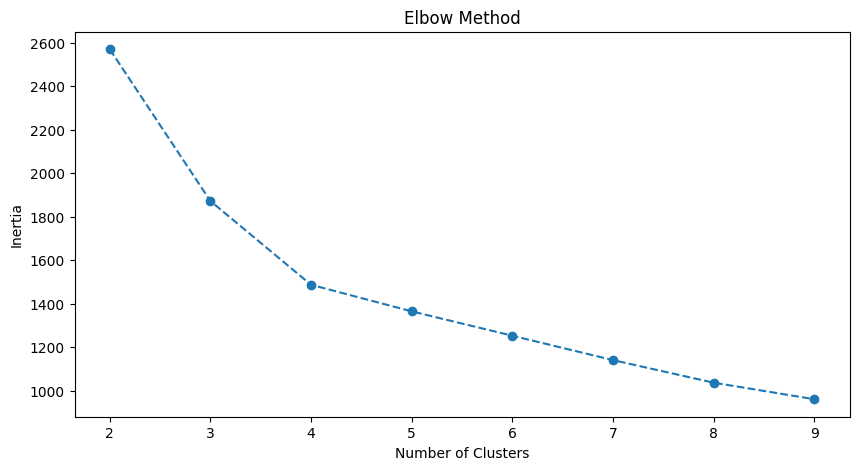

In [29]:
# elbow method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

### Generate and Assign Clusters to Customers

In [30]:
# As the Silhouette Score metric and the Silhouette and Elbow plots indicated that the ideal number of clusters is 4, we will use this amount in K-MEANS

k = 4  # Define the desired number of clusters (in this case, 4)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Create the KMeans model with 4 clusters and stable initialization
df['cluster'] = kmeans.fit_predict(X_pca)  # Apply the model to the data (reduced via PCA) and assign cluster labels to the DataFrame
df.head(10)  # Display the first 10 rows of the DataFrame with the new 'cluster' column

,customer_id,age,income,spending_score,region_Norte,region_Oeste,region_Sul,cluster
0,CUST_1,56,23343,81,False,True,False,2
1,CUST_2,69,33500,5,False,False,True,1
2,CUST_3,46,73222,29,False,False,False,0
3,CUST_4,32,49375,4,False,True,False,2
4,CUST_5,60,29662,10,False,True,False,2
5,CUST_6,25,36964,56,False,True,False,2
6,CUST_7,38,133429,17,True,False,False,3
7,CUST_8,56,141692,74,False,False,True,1
8,CUST_9,36,79638,17,True,False,False,3
9,CUST_10,40,93666,84,False,False,True,1


### Visualization

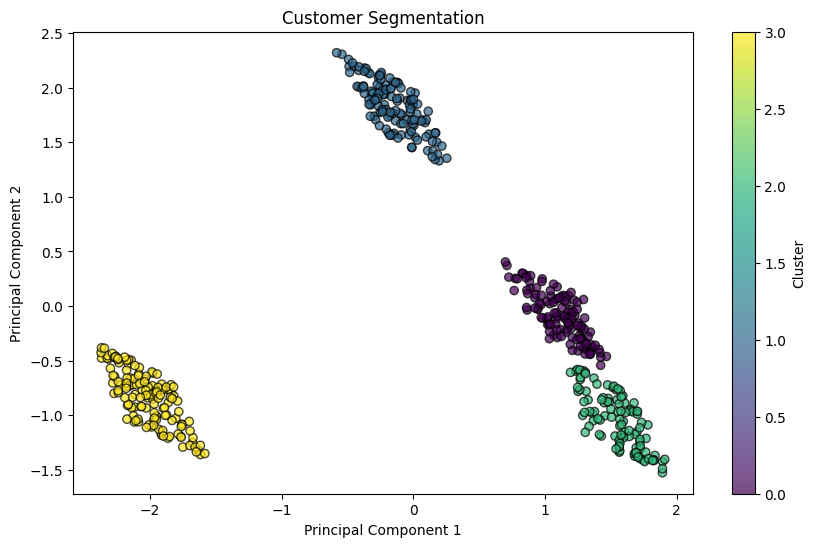

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7, edgecolors='black')
plt.title("Customer Segmentation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

## Calculating the Average Spending per Cluster

In [32]:
# Average spending per cluster.

average_spending_by_cluster = df.groupby('cluster')['spending_score'].mean()
print("Average Spending Score per Cluster:")
average_spending_by_cluster

Average Spending Score per Cluster:


,spending_score
cluster,
0,51.227642
1,44.511450
2,51.047170
3,47.514286
